In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Cust_Segmentation.csv')

In [3]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [5]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df = df.drop(['Customer Id','Address'],axis = 1)

In [7]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [8]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Defaulted,150,17.6


In [11]:
mode_value = df['Defaulted'].mode()[0] # calculate mode value
df['Defaulted'].fillna(mode_value, inplace=True) 

In [12]:
scaler = StandardScaler()                       # Scale the data
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns = df.columns)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_k

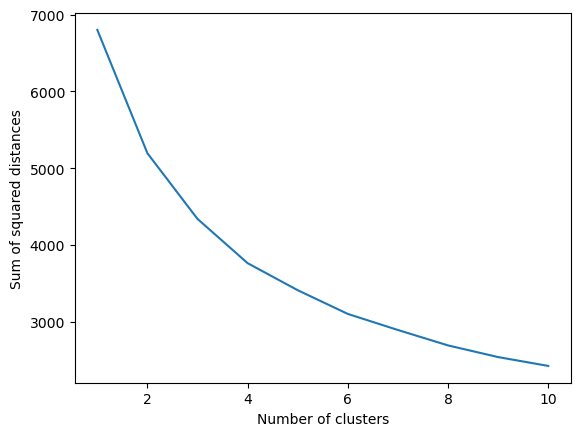

In [13]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter =300, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# plot the sum of squared distances for each k value
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [14]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507
...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817


In [15]:

kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model to the data
kmeans.fit(df)
labels = kmeans.predict(df)
# add the labels to the original dataset
df['Labels'] = labels

D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525,0
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387,3
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554,2
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525,0
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507,1
...,...,...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.523797,-0.502070,0
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.523797,-0.472288,0
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,1.909138,3.458923,2
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-0.523797,-1.082817,0


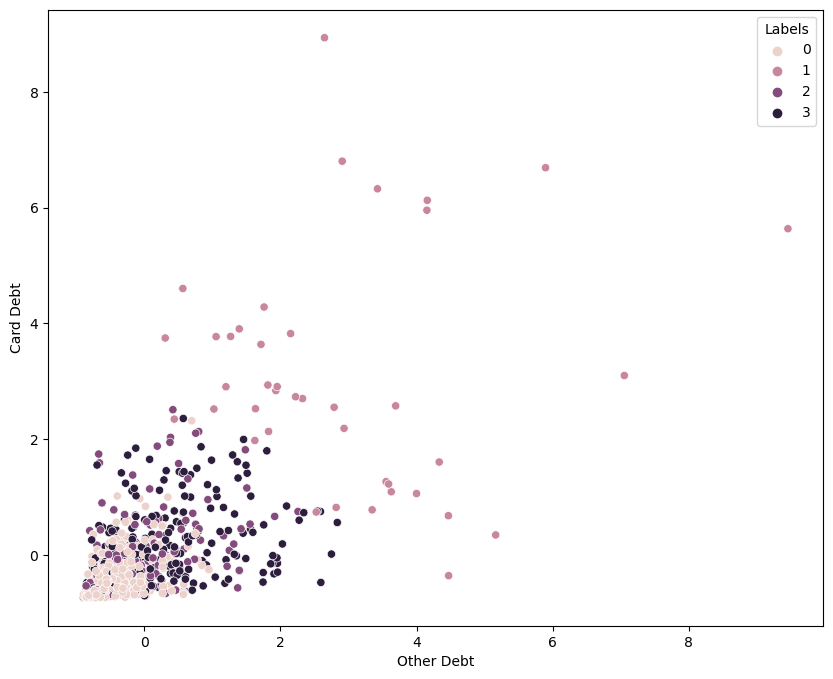

In [17]:
plt.figure(figsize =(10,8))
sns.scatterplot(x='Other Debt', y='Card Debt', hue='Labels', data=df)

# show the plot
plt.show()

In [18]:
# Checking the accuracy of model by finding Silhouette score and Inertial score
# calculate the Silhouette score
score = silhouette_score(df.loc[:, :'Labels'], kmeans.labels_, metric='euclidean')
print(f'Silhouette score: {score:.3f}')

# calculate the Inertia score
inertia = kmeans.inertia_
print(f'Inertia score: {inertia:.3f}')

Silhouette score: 0.396
Inertia score: 3763.027


# Answer of question 1
#### Splitting data into training and testing sets is not necessary for K-means clustering because it is an unsupervised learning algorithm that does not use labeled data for training. Instead, K-means clustering uses only the input features to group the data points into clusters based on their similarity.

#### However, it is common to use K-means clustering as a preprocessing step before applying a supervised learning algorithm, such as regression or classification, on the clustered data. In such cases, splitting the data into training and testing sets is necessary for evaluating the performance of the supervised learning algorithm.


# Answer of question 2
#### Distance-based algorithm: K-means clustering is a distance-based algorithm, which means that it measures the similarity between data points based on their distances from each other. If the features are on different scales, then the distances between data points will be dominated by the features with larger scales. As a result, the clustering may be biased towards the features with larger scales, leading to inaccurate or suboptimal results.

#### Equal weightage: K-means clustering assigns equal weightage to all the features. If the features are on different scales, then the features with larger scales will have a greater influence on the clustering results than the features with smaller scales. Scaling the features ensures that they all have the same weightage in the clustering process.

#### Outlier detection: Scaling can also help in detecting outliers. If a feature has a very large scale compared to the other features, then any data point with an extreme value in that feature may be considered an outlier, even if it is a valid data point. Scaling the features can reduce the influence of such outliers on the clustering results.